# Phase 1 : Basic EDA

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3
from matplotlib_venn import venn2

## train.csv:

In [ ]:
train = pd.read_csv('/content/train.csv', encoding='latin-1')

In [ ]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [ ]:
#np. of rows and columns in train.csv
train.shape

(74067, 5)

In [ ]:
#No. of unique search/product pairs
train.id.nunique()

74067

In [ ]:
#checking if any duplicate rows are present
train.duplicated().sum()

0

In [ ]:
# checking for missing values
train.isna().sum()

id               0
product_uid      0
product_title    0
search_term      0
relevance        0
dtype: int64

Observation:
- All the rows are unqiue search-product pairs.
- No duplicate rows.
- There are no missing values in train data.


Relevance:

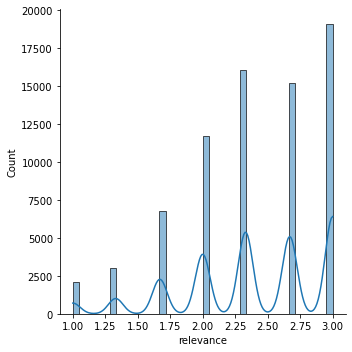

In [ ]:
#distribution of relevance score
sns.displot(train['relevance'], kde = True)

In [ ]:
#no. of products having relevance score >2
len(train[train['relevance']>2])

50428

Product_uid:




In [ ]:
#No. of unique products in train data
train.product_uid.nunique()

54667

Search_term: 

In [ ]:
#No. of unique search terms in train data
train.search_term.nunique()

11795

Observation:
- Most of the search/product (50k) pairs  in the train data have high relevance score >2.
- Total number of unique products in train - 54667 which means products are repeating with different search terms.
- Only 11795 search terms are unique.

## test data.csv :

In [ ]:
test = pd.read_csv('/content/test.csv', encoding='latin-1')

In [ ]:
test.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [ ]:
test.shape

(166693, 4)

In [ ]:
#checking for duplicate rows
test.duplicated().sum()

0

In [ ]:
# missing values
test.isna().sum()

id               0
product_uid      0
product_title    0
search_term      0
dtype: int64

Observation:
- There aren't any duplicate ids. Hence, we have a total of 166693 unique search/product pairs in test data.
- no missing values in test data

** Checking for intersection in train and test datasets: **
--



1. id: 

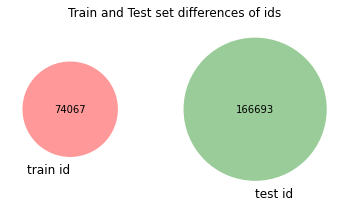

In [ ]:
#https://stackoverflow.com/questions/19841535/python-matplotlib-venn-diagram
train_id = set(train['id'].values)
test_id = set(test['id'].values)



venn2([train_id, test_id], ('train id', 'test id'))
plt.title('Train and Test set differences of ids')
plt.show()

-  All the test ids are different than train ids (i.e. we don't have common search-product pairs in train and test datasets.

In [ ]:
#checking for unique ids
test.id.nunique()

166693

2. product_uid:


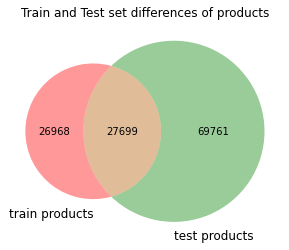

In [ ]:
from matplotlib_venn import venn2

#https://stackoverflow.com/questions/19841535/python-matplotlib-venn-diagram
train_products = set(train['product_uid'].values)
test_products = set(test['product_uid'].values)



venn2([train_products, test_products], ('train products', 'test products'))
plt.title('Train and Test set differences of products')
plt.show()

- Around 27k products of the train data (almost 50%) are present in the test data which take up almost 28.4% of the test data.


In [ ]:
#no. of unique products in test data
test.product_uid.nunique()

97460

3. search_term:

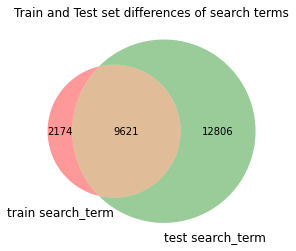

In [ ]:
#https://stackoverflow.com/questions/19841535/python-matplotlib-venn-diagram
train_search_term = set(train['search_term'].values)
test_search_term = set(test['search_term'].values)



venn2([train_search_term, test_search_term], ('train search_term', 'test search_term'))
plt.title('Train and Test set differences of search terms')
plt.show()

-  Around 9621 search terms of the train data(81.5%) are present in the test data which take up almost 42.8% of the test data.

In [ ]:
#no. of unique search terms in test data
test.search_term.nunique()

22427

## product_description.csv :

In [ ]:
product_descriptions = pd.read_csv('product_descriptions.csv')

In [ ]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [ ]:
#no. of rows and columns
product_descriptions.shape

(124428, 2)

In [ ]:
#all products are unique (no duplicate products)
product_descriptions.product_uid.nunique() == product_descriptions.shape[0]

True

/usr/local/lib/python3.7/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


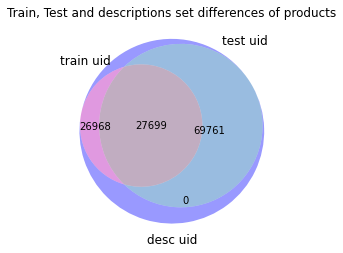

In [ ]:
from matplotlib_venn import venn3

train_uid = set(train['product_uid'].values)
test_uid = set(test['product_uid'].values)
desc_uid = set(product_descriptions['product_uid'].values)


venn3([train_uid, test_uid, desc_uid], ('train uid', 'test uid', 'desc uid'))
plt.title('Train, Test and descriptions set differences of products')
plt.show()

- Every product from the train as well as test data has a verbose description.

In [ ]:
#Missing values
product_descriptions.isna().sum()

product_uid            0
product_description    0
dtype: int64

- No missing values

##attributes.csv :

In [ ]:
attributes = pd.read_csv('/content/attributes.csv')

In [ ]:
attributes.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [ ]:
#no. of rows and columns
attributes.shape

(2044803, 3)

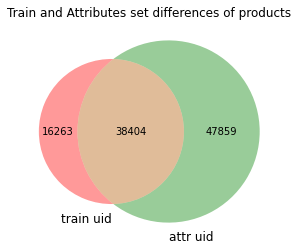

In [ ]:
#how many products from train data don't have attributes
train_uid = set(train['product_uid'].values)
attr_uid = set(attr_copy['product_uid'].values)


venn2([train_uid, attr_uid], ('train uid', 'attr uid'))
plt.title('Train and Attributes set differences of products')
plt.show()

- 16263 (Around 30%) train products don't have attributes.

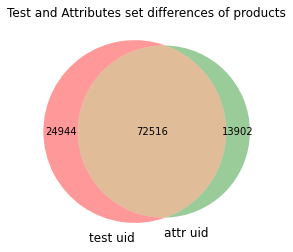

In [ ]:
#how many products from test data don't have attributes

test_uid = set(test['product_uid'].values)
attr_uid = set(attributes['product_uid'].values)


venn2([test_uid, attr_uid], ('test uid', 'attr uid'))
plt.title('Test and Attributes set differences of products')
plt.show()

- 24944 (Around 25%) test products don't have attributes.

In [ ]:
#no. of unique attribute types
attributes['name'].nunique()

5410

- There are 5410 different types of attributes.

In [ ]:
#missing values
attributes.isna().sum()

product_uid     155
name            155
value          2284
dtype: int64

In [ ]:
# Dropping the rows where all columns are nan
attr_copy = attributes.copy()
attr_copy.dropna(how = 'all',inplace= True)

- Dropped 155 rows because all values were missing

In [ ]:
#checking the updated data's missing values
attr_copy[attr_copy.isnull().any(axis=1)].isna().sum()

product_uid       0
name              0
value          2129
dtype: int64

- 2129 attribute values are missing.




